# Weighted Directed Graphs
if every directed edge in graph has some <b>weight</b> associated to it than this type of graph is called <b>Weighted Directed Graph.</b> as soon as you  introduced generaly you will always get unique shortest path beacuse even if two paths have same number of nodes generally they will have different weights in context of path finding wieght is also called <b>cost</b> from going for going from one node to another

In [26]:
class WeightedDiGraph:           # directed graph
    
    def __init__(self):      
        self.g={}
        
    def add_node(self,node):
        
        if node not in self.g:        # if node not in graph insert it
            self.g[node]=[]
            
    def add_edge(self,src,dest,weight):
        weighted_edge=(dest,weight)
        if src in self.g and dest in self.g and dest not in self.g[src]:  # if both src,dest in graph and if edges does exists
            self.g[src].append(weighted_edge)
        
        elif src not in self.g:    #raise error
            raise KeyError(str(src)+" not in graph")
        
        elif dest not in self.g:
            raise KeyError(str(dest)+" not in graph")
            
            

## Visualization

In [27]:
import networkx as nx
import matplotlib.pyplot as plt


In [28]:
def draw_graph_with_nx(graph):
    pos=nx.spring_layout(graph,iterations=200)
    options={'node_color':'white','alpha':1,'node_size':2000,'width':0.002,'font_family':'Arial','font_size':25,'arrows':True,
             'edge_color':'brown','arrowstyle':'Fancy,head_length=1,head_width=1,tail_width=.4'}
    labels=nx.get_node_attributes(graph,'label')
    weight_labels=nx.get_edge_attributes(graph,'weight')
    nx.draw(graph,pos,labels=labels,**options)
    nx.draw_networkx_edge_labels(graph,pos,edge_labels=weight_labels,font_size=15)
    plt.show

In [29]:
def draw_graph(self):
    G=nx.DiGraph()
    for src in self.g:
        G.add_node(src,label=src)
        for dest in self.g[src]:
            G.add_edge(src,dest[0],weight=str(dest[1]))
    draw_graph_with_nx(G)
WeightedDiGraph.draw_graph=draw_graph    

### graph 1

In [30]:

nodes=['a','b','c','d','e','f']

edges=[ 
        ['a','b',1],
        ['a','c',2],
        ['b','c',3],
        ['b','d',4],
        ['c','d',5],
        ['d','c',6], 
        ['e','f',7], 
        ['f','c',8],
    ]



In [52]:
g=WeightedDiGraph()

for node in nodes:
    g.add_node(node)
    
    
for edge in edges:
    g.add_edge(edge[0],edge[1],edge[2])

    

In [31]:
print(g.g)

{'a': [('b', 1), ('c', 2)], 'b': [('c', 3), ('d', 4)], 'c': [('d', 5)], 'd': [('c', 6)], 'e': [('f', 7)], 'f': [('c', 8)]}


### graph 2

In [53]:
nodes2=['a','b','c','d','e']

edges2=[
        ('a','b',4),
        ('a','c',1), 
        ('b','d',8), 
        ('c','e',25), 
        ('e','d',3), 
    ]



In [54]:
g2=WeightedDiGraph()

for node in nodes2:
    g2.add_node(node)
    
    
for edge in edges2:
    g2.add_edge(edge[0],edge[1],edge[2])
    


In [34]:
from IPython.display import Image, display

###  graph 2 Initial condition

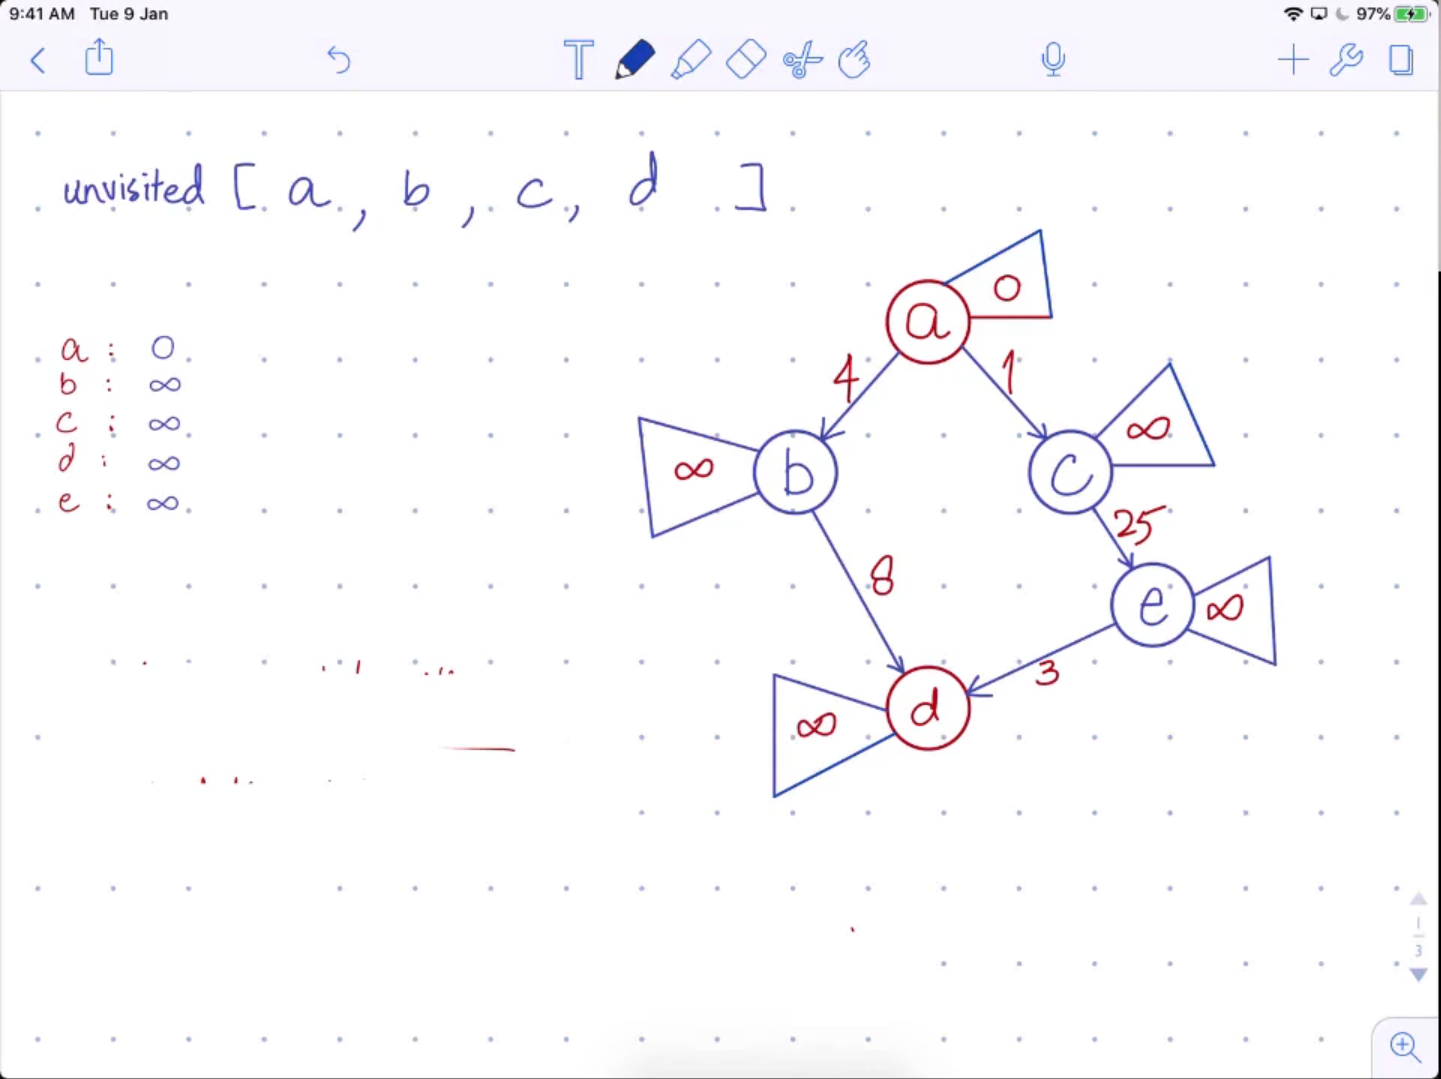

In [55]:
display(Image(filename='C:\\Users\\ok\\Pictures\\Screenshots\\g2p.png'))

## After Running algorithim

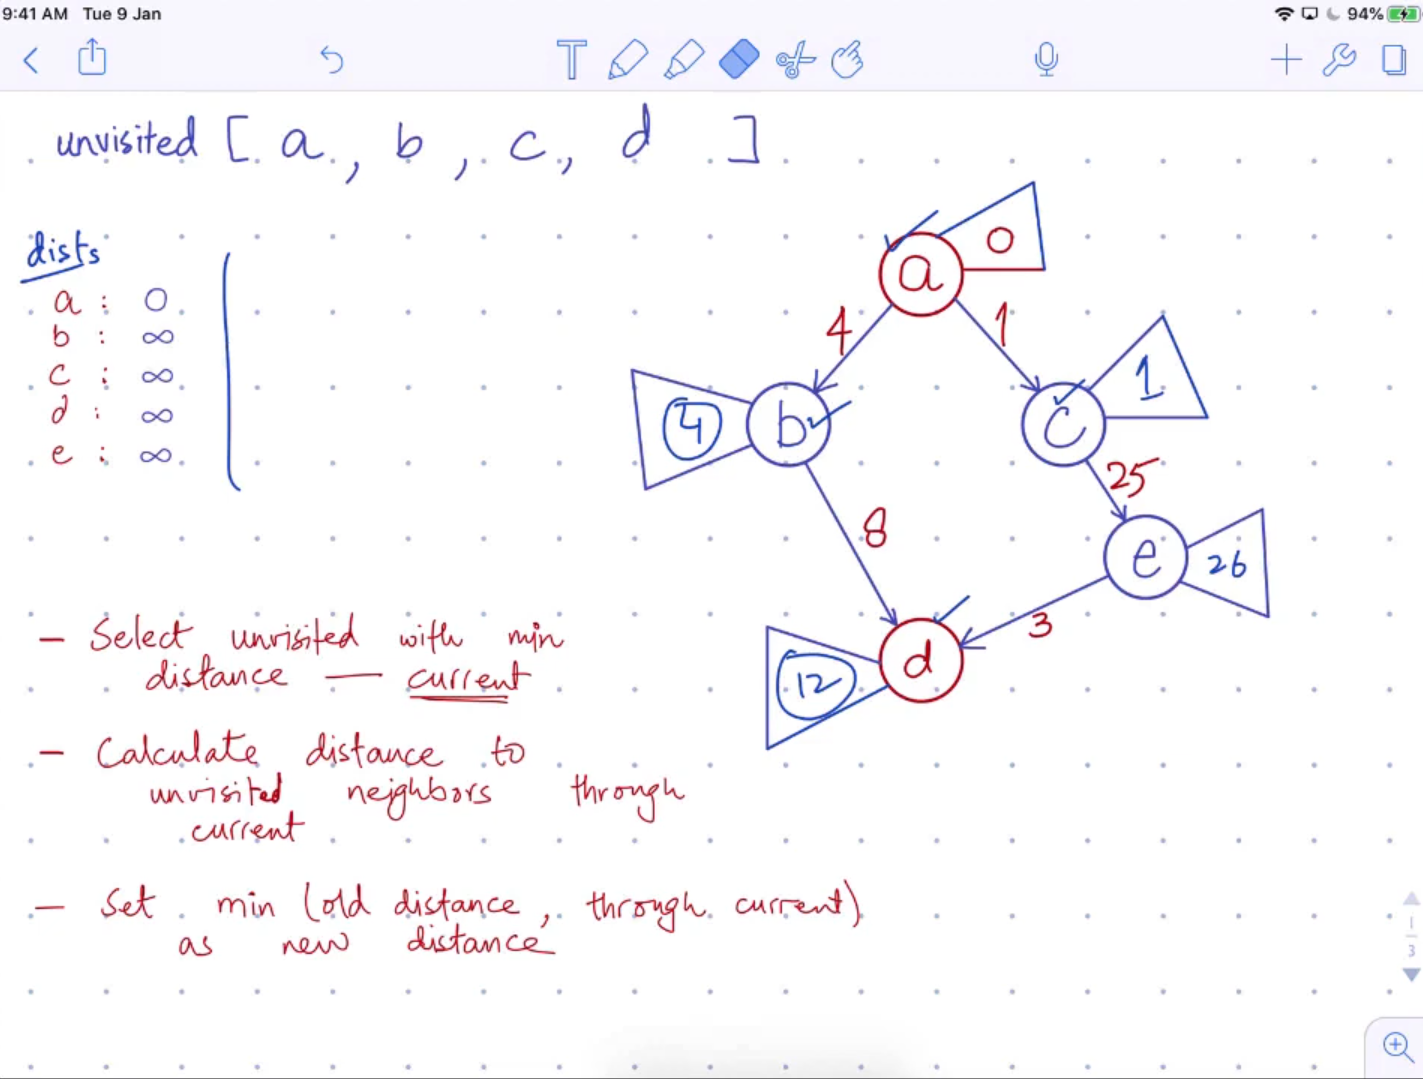

In [56]:
display(Image(filename='C:\\Users\\ok\\Pictures\\Screenshots\\g2.png'))

# Dijkstra Shortest path algorithim 
whenever you talk about dijkstra algorithim it is generally concern with cost not path so we will first implement cost than paths <br>
dijkstra algorithim is really simple with follwing steps:<br>
<b>Step 1</b> : Mark all nodes in graph as <b>visited</b> and <b>distance</b> to reach all node as infinity than set distance to reach src to 0 because you are already there.
<br><b>Step 2</b> : Start <b>iteration</b> and continue untill all nodes are visited.
<br><b>Step 1</b> : In each Iteration pick node with <b>minimum distance</b> from list of unvisted node 
<br><b>Step 1</b> : See its all <b>unvisited neighbours</b> and their distance 
<br><b>Step 1</b> : If this provides <b>shorter</b> distance update distance

In [80]:
def dijsktra_shortest_path_cost(self,src,dest):
    
    # python representaion of infinity its  not INT_MAX(CPP) its actual infinity
    inf=float('inf')
    
    # Mark all nodes unvisited and store them
    unvisited=list(self.g.keys())
    print("To visit "+str(unvisited))
    
    #set distance to zero for initial or src node and to infinity for rest
    dists={node:inf  for node in unvisited}
    dists[src]=0
    
    print("All distances "+str(dists))
    
    #lets loop
    while unvisited:
        print("--------")
        
        #select the unvisited node with smallest distance
        #can't compare 'a' with 'b',So we compare dists['a']with dists['b']
        current = min(unvisited,key=lambda node:dists[node])
        
        print("Current : "+str(current))
        unvisited.remove(current)
        
        #check to make sure minimum distance isn't infinity
        if dists[current]==inf:
            break
            
        all_neighbours=self.g[current]    
        unvisited_neighbours_current=[]
        
        for neighbour in all_neighbours:
            if neighbour[0] in unvisited:   #recall that we appended tuples not single element
                unvisited_neighbours_current.append(neighbour)
        
        print("unvisited neighbours of "+str(current)+" : "+str(unvisited_neighbours_current))
                
        for neighbour in unvisited_neighbours_current:
            
            node=neighbour[0]
            dist_from_current_node=neighbour[1]
        
            old_distance=dists[node]
            new_distance=dists[current]+dist_from_current_node
        
            # if new distance is smaller than this is shortest path or distance
            if new_distance<old_distance:
                dists[node]=new_distance
                
            #dists[node]=min(new_distance,old_distance)  #alternative
                
        print("All distances"+str(dists))
                
    return dists
                
WeightedDiGraph.dijsktra_shortest_path_cost = dijsktra_shortest_path_cost      

In [81]:
g2.dijsktra_shortest_path_cost('a','d')

To visit ['a', 'b', 'c', 'd', 'e']
All distances {'a': 0, 'b': inf, 'c': inf, 'd': inf, 'e': inf}
--------
Current : a
unvisited neighbours of a : [('b', 4), ('c', 1)]
All distances{'a': 0, 'b': 4, 'c': 1, 'd': inf, 'e': inf}
--------
Current : c
unvisited neighbours of c : [('e', 25)]
All distances{'a': 0, 'b': 4, 'c': 1, 'd': inf, 'e': 26}
--------
Current : b
unvisited neighbours of b : [('d', 8)]
All distances{'a': 0, 'b': 4, 'c': 1, 'd': 12, 'e': 26}
--------
Current : d
unvisited neighbours of d : []
All distances{'a': 0, 'b': 4, 'c': 1, 'd': 12, 'e': 26}
--------
Current : e
unvisited neighbours of e : []
All distances{'a': 0, 'b': 4, 'c': 1, 'd': 12, 'e': 26}


{'a': 0, 'b': 4, 'c': 1, 'd': 12, 'e': 26}

### graph 3

In [82]:
nodes3=['a','b','c','d','e','f','g','h']
edges3=[
        ('a','b',4),
        ('a','c',1), 
        ('b','d',8), 
        ('c','e',25), 
        ('e','d',3), 
        ('d','f',5), 
        ('d','g',7), 
        ('f','h',2),     # first try commenting this than see dist
        ('g','h',9),     # also comment this and see dist to h
    ]

  

In [83]:
g3=WeightedDiGraph()

for node in nodes3:
    g3.add_node(node)
    
    
for edge in edges3:
    g3.add_edge(edge[0],edge[1],edge[2])

    

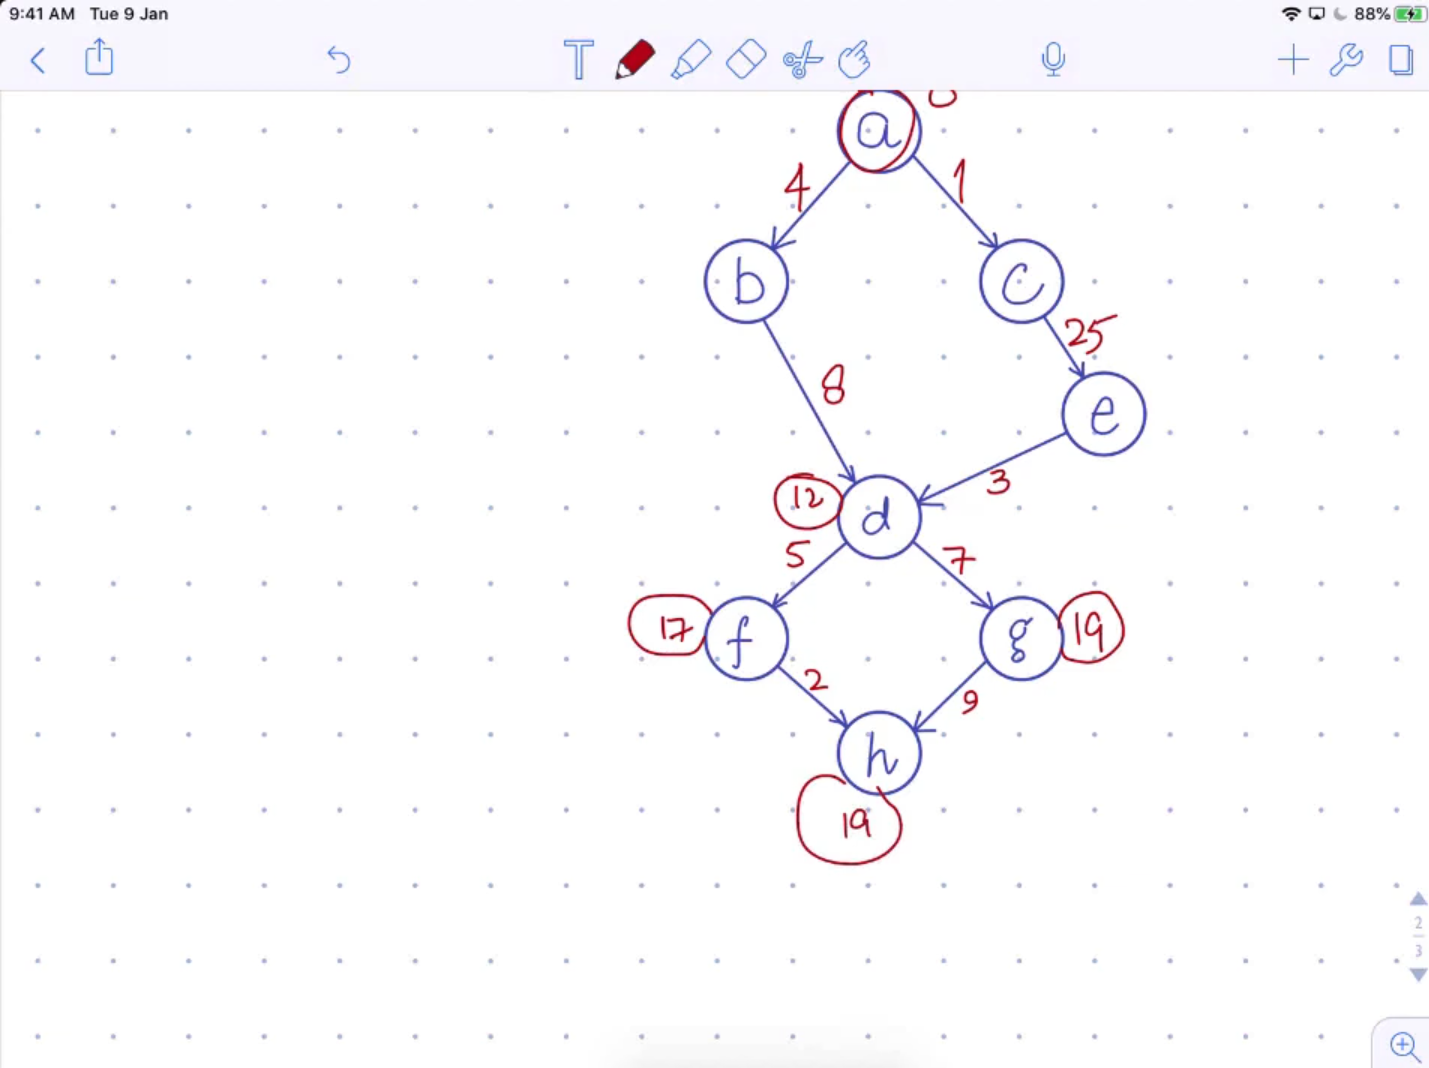

In [84]:
display(Image(filename='C:\\Users\\ok\\Pictures\\Screenshots\\g3.png'))


In [85]:
g3.dijsktra_shortest_path_cost('a','h')

To visit ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
All distances {'a': 0, 'b': inf, 'c': inf, 'd': inf, 'e': inf, 'f': inf, 'g': inf, 'h': inf}
--------
Current : a
unvisited neighbours of a : [('b', 4), ('c', 1)]
All distances{'a': 0, 'b': 4, 'c': 1, 'd': inf, 'e': inf, 'f': inf, 'g': inf, 'h': inf}
--------
Current : c
unvisited neighbours of c : [('e', 25)]
All distances{'a': 0, 'b': 4, 'c': 1, 'd': inf, 'e': 26, 'f': inf, 'g': inf, 'h': inf}
--------
Current : b
unvisited neighbours of b : [('d', 8)]
All distances{'a': 0, 'b': 4, 'c': 1, 'd': 12, 'e': 26, 'f': inf, 'g': inf, 'h': inf}
--------
Current : d
unvisited neighbours of d : [('f', 5), ('g', 7)]
All distances{'a': 0, 'b': 4, 'c': 1, 'd': 12, 'e': 26, 'f': 17, 'g': 19, 'h': inf}
--------
Current : f
unvisited neighbours of f : [('h', 2)]
All distances{'a': 0, 'b': 4, 'c': 1, 'd': 12, 'e': 26, 'f': 17, 'g': 19, 'h': 19}
--------
Current : g
unvisited neighbours of g : [('h', 9)]
All distances{'a': 0, 'b': 4, 'c': 1, 'd': 12, '

{'a': 0, 'b': 4, 'c': 1, 'd': 12, 'e': 26, 'f': 17, 'g': 19, 'h': 19}

now you have seen algorithim now think about it whats the main difference b/w the path finding algorithim we implemented and this our implemention have problem of <b> repeated sub Problem</b> (remember <b>fibonacci recursive</b>) so now what makes dijkstras algorithim efficient it is same as our implementaion it just uses <b>Memoization</b> read abour memoization more and try implementing memoization for fibonacci as well